This notebook was used to generate the t-SNE visualization in the Thesis

In [4]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np

# Load pre-trained TinyBERT model and tokenizer
model_name = "huawei-noah/TinyBERT_General_4L_312D"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# List of short texts
texts = [
    "Negative",
    "Positive",
    "NEGATIVE",
    "NEG",
    "Not Detected",
    "Detected",
    "NOT DETECTED",
    "Comment",
    "SEE NOTE",
    "SEE TEXT"
]

# Function to generate CLS embedding for a text
def get_cls_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :]
    return cls_embedding.squeeze().cpu().numpy()

# Function to generate average token embedding for a text
def get_avg_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
        token_embeddings = outputs.last_hidden_state
        avg_embedding = torch.mean(token_embeddings, dim=1)
    return avg_embedding.squeeze().cpu().numpy()

# Generate embeddings for all texts
cls_embeddings = np.array([get_cls_embedding(text) for text in texts])
avg_embeddings = np.array([get_avg_embedding(text) for text in texts])

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


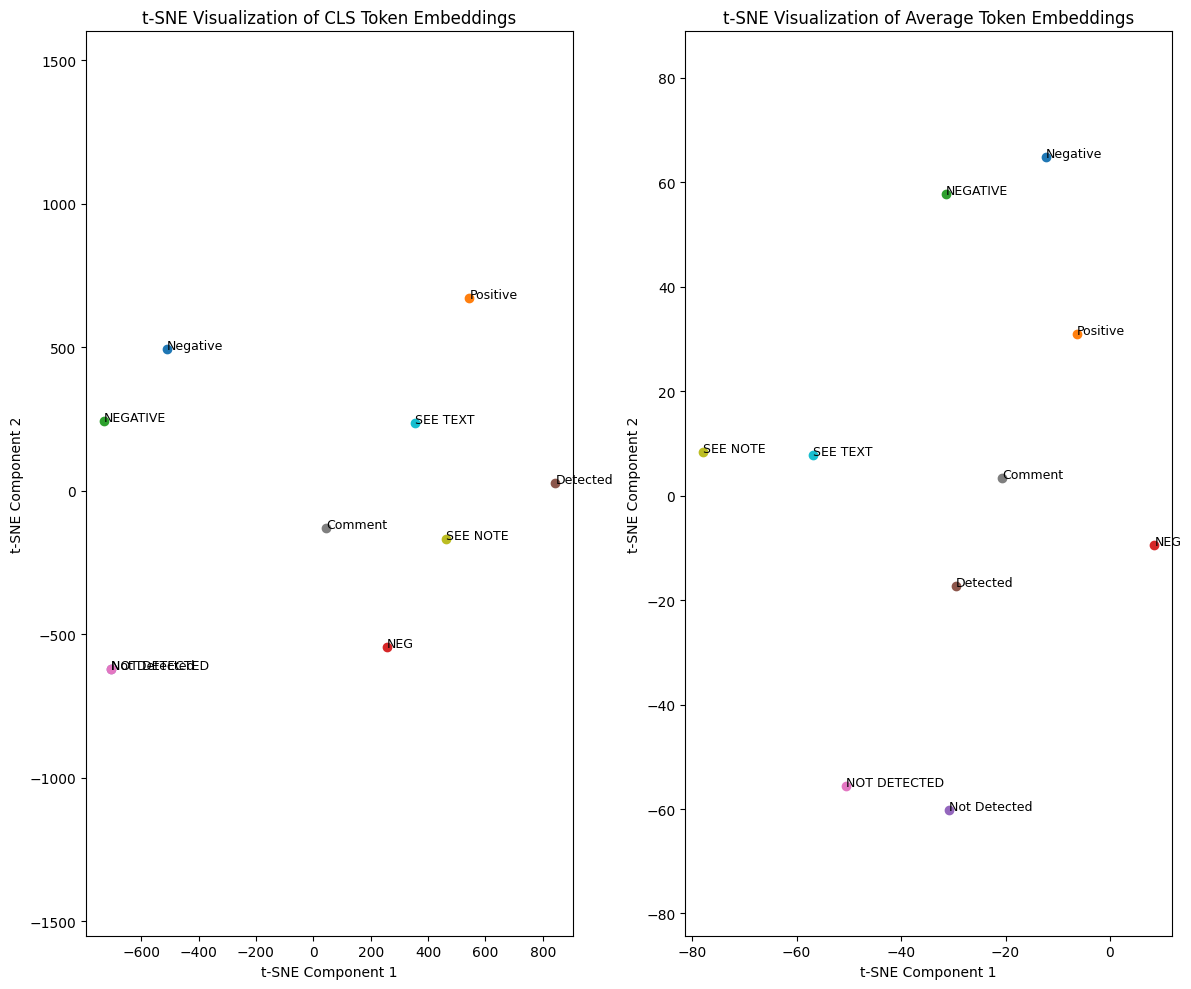

In [14]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Reduce dimensionality using t-SNE with adjusted perplexity
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
cls_embeddings_2d = tsne.fit_transform(cls_embeddings)
avg_embeddings_2d = tsne.fit_transform(avg_embeddings)

# Plot the 2D embeddings
plt.figure(figsize=(12, 10))

# Subplot for CLS embeddings
plt.subplot(1, 2, 1)
for i, text in enumerate(texts):
    plt.scatter(cls_embeddings_2d[i, 0], cls_embeddings_2d[i, 1])
    plt.annotate(text, (cls_embeddings_2d[i, 0], cls_embeddings_2d[i, 1]), fontsize=9)
plt.title("t-SNE Visualization of CLS Token Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.axis('equal')  # Ensures equal scaling

# Subplot for Average Token embeddings
plt.subplot(1, 2, 2)
for i, text in enumerate(texts):
    plt.scatter(avg_embeddings_2d[i, 0], avg_embeddings_2d[i, 1])
    plt.annotate(text, (avg_embeddings_2d[i, 0], avg_embeddings_2d[i, 1]), fontsize=9)
plt.title("t-SNE Visualization of Average Token Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.axis('equal')  # Ensures equal scaling

plt.tight_layout()
plt.savefig('tinybert_embeddings.png')
plt.show()
